<a href="https://colab.research.google.com/github/Hoyadeath/practice_AI/blob/main/P_2_HR_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. 데이터 불러오기

In [ ]:
from google.colab import files
hr_data = files.upload()

Saving hr_data.csv to hr_data.csv


In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
import matplotlib

In [ ]:
print("library version check")
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("missingno:", msno.__version__)

library version check
numpy: 1.25.2
pandas: 1.5.3
matplotlib: 3.7.1
missingno: 0.5.2


In [ ]:
df = pd.read_csv(io.BytesIO(hr_data['hr_data.csv']), encoding="utf-8", index_col=0)
df

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition
0,1980-7-20,2013,sales,single,high,very high,8.33,9431500,8923739,8.0,yes
1,1972-11-8,2011,rnd,married,very high,medium,6.93,5170672,4617495,NaN,no
2,1984-5-7,2014,rnd,single,high,high,9.00,9898200,9176045,6.0,yes
3,1988-10-19,2013,rnd,married,high,high,8.33,5673500,5362476,1.0,no
4,1994-7-11,2015,rnd,married,high,medium,7.20,3484080,3284389,9.0,no
...,...,...,...,...,...,...,...,...,...,...,...
1465,1985-2-13,2004,rnd,married,high,very high,7.50,3488175,3214315,4.0,no
1466,1982-5-21,2012,rnd,married,high,low,8.33,4442500,4113806,4.0,no
1467,1994-2-5,2015,rnd,married,very high,medium,8.33,8715500,7908802,1.0,no
1468,1972-4-17,2004,sales,married,high,medium,8.67,6804200,6333023,2.0,no


In [ ]:
df.head()

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition
0,1980-7-20,2013,sales,single,high,very high,8.33,9431500,8923739,8.0,yes
1,1972-11-8,2011,rnd,married,very high,medium,6.93,5170672,4617495,NaN,no
2,1984-5-7,2014,rnd,single,high,high,9.00,9898200,9176045,6.0,yes
3,1988-10-19,2013,rnd,married,high,high,8.33,5673500,5362476,1.0,no
4,1994-7-11,2015,rnd,married,high,medium,7.20,3484080,3284389,9.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   birthday              1470 non-null   object 
 1   entry_year            1470 non-null   int64  
 2   department            1470 non-null   object 
 3   marital_status        1143 non-null   object 
 4   performance_rating    1470 non-null   object 
 5   job_satisfaction      1470 non-null   object 
 6   working_hours         1470 non-null   float64
 7   salary                1470 non-null   int64  
 8   last_year_salary      1470 non-null   int64  
 9   num_companies_worked  1209 non-null   float64
 10  attrition             1470 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 137.8+ KB


###2. 결측치

<Axes: >

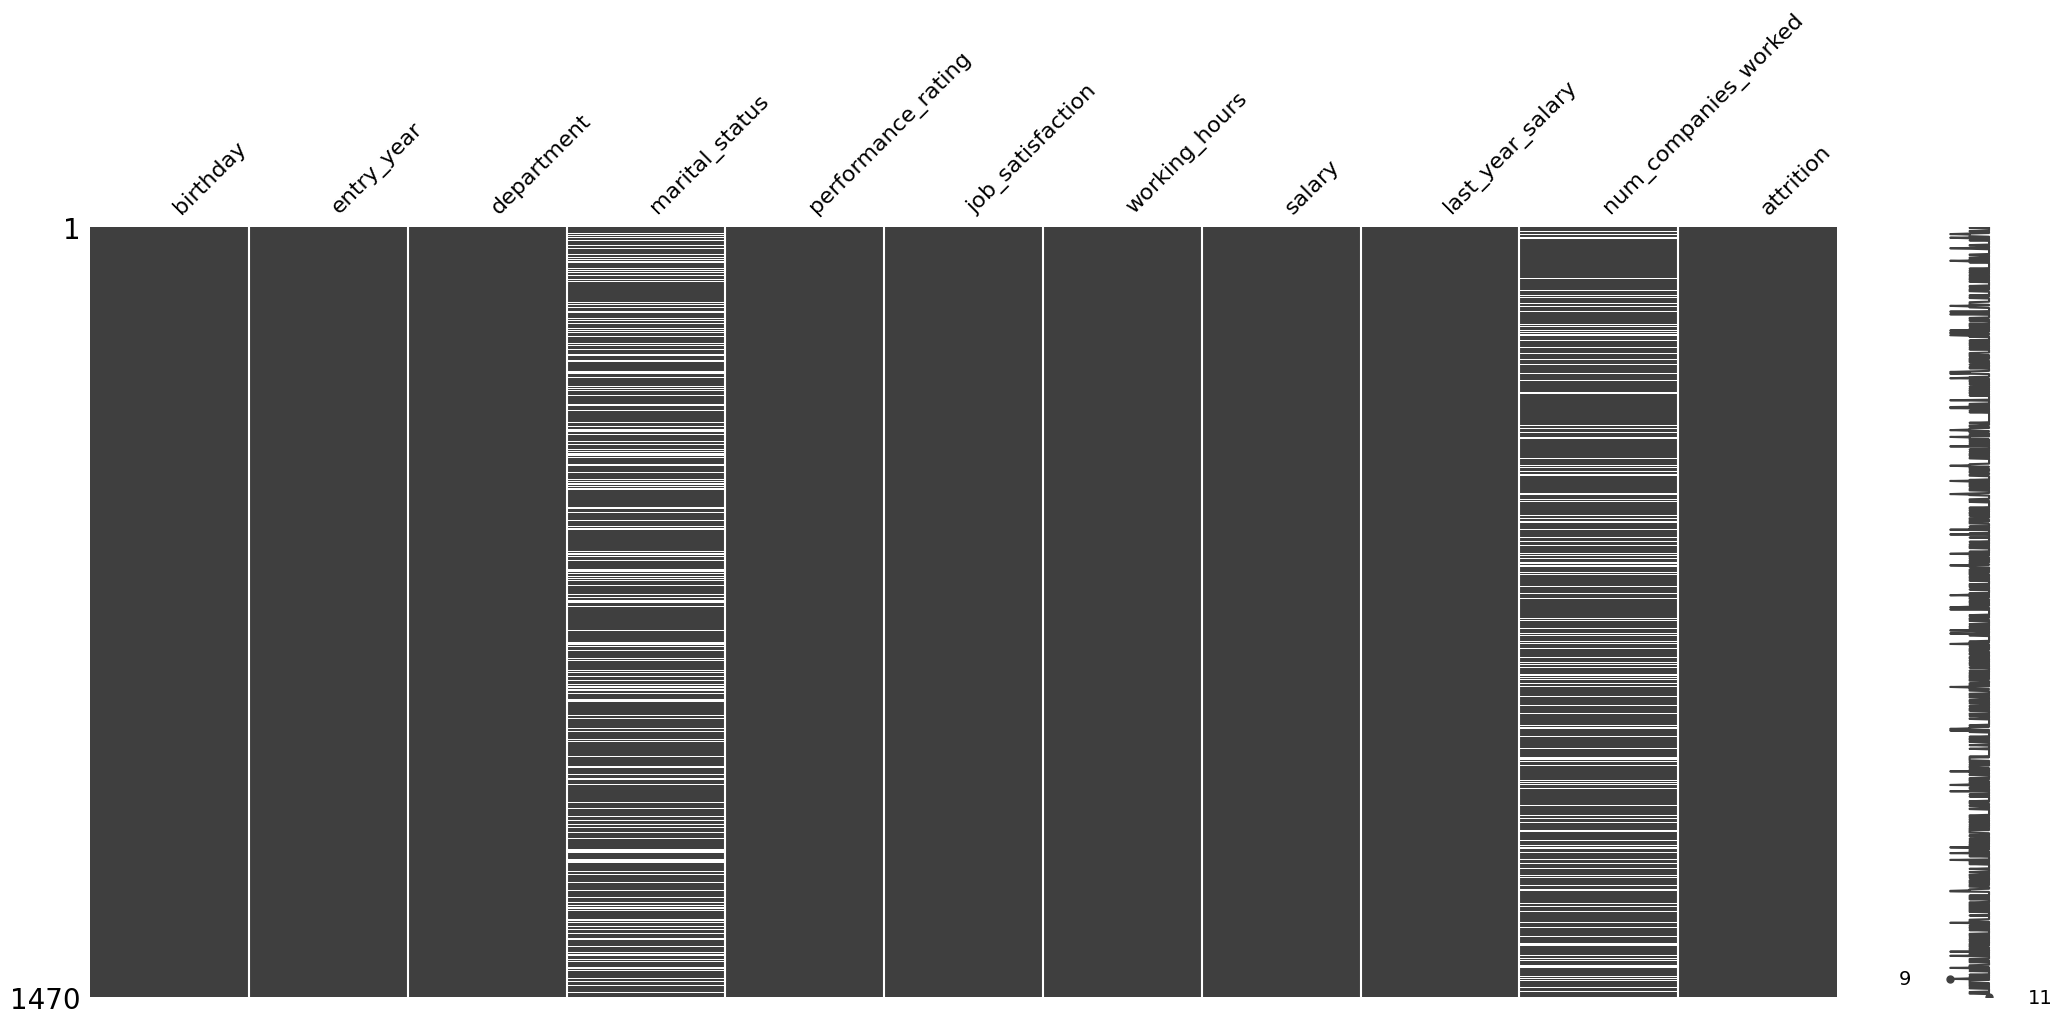

In [ ]:
msno.matrix(df)

In [ ]:
print("the length of marital_status missing index:",
      len(df[df["marital_status"].isnull()].index))

the length of marital_status missing index: 327


In [ ]:
print("the length of num_companies_worked:",
      len(df[df["num_companies_worked"].isnull()].index))

the length of num_companies_worked: 261


In [ ]:
print("the length of marital_status & num_companies_worked missing index:",
      len(set(df[df["marital_status"].isnull()].index).union(
          set(df[df["num_companies_worked"].isnull()].index))))

the length of marital_status & num_companies_worked missing index: 539


In [ ]:
df["marital_status"] = df["marital_status"].fillna("etc")

###2-1.Numerical. 수치형데이터 ex)일한 회사의 수

In [ ]:
print("중앙값:", df["num_companies_worked"].median())
print("평균:", df["num_companies_worked"].mean())

중앙값: 2.0
평균: 2.7237386269644333


###### 결측이 있는 부분을 중앙값으로 채움

In [ ]:
df["num_companies_worked"] = df["num_companies_worked"].fillna(df["num_companies_worked"].median())

###2-2. Categorical 범주형 데이터 ex) 결혼 여부

In [ ]:
df["marital_status"].value_counts()

married    673
single     470
etc        327
Name: marital_status, dtype: int64

##### 결측이 있는 부분은 새로운 범주로 채움

In [ ]:
df["marital_status"] = df["marital_status"].fillna("etc")

In [ ]:
df["marital_status"].value_counts()

married    673
single     470
etc        327
Name: marital_status, dtype: int64

###### 결측치 해결완료

<Axes: >

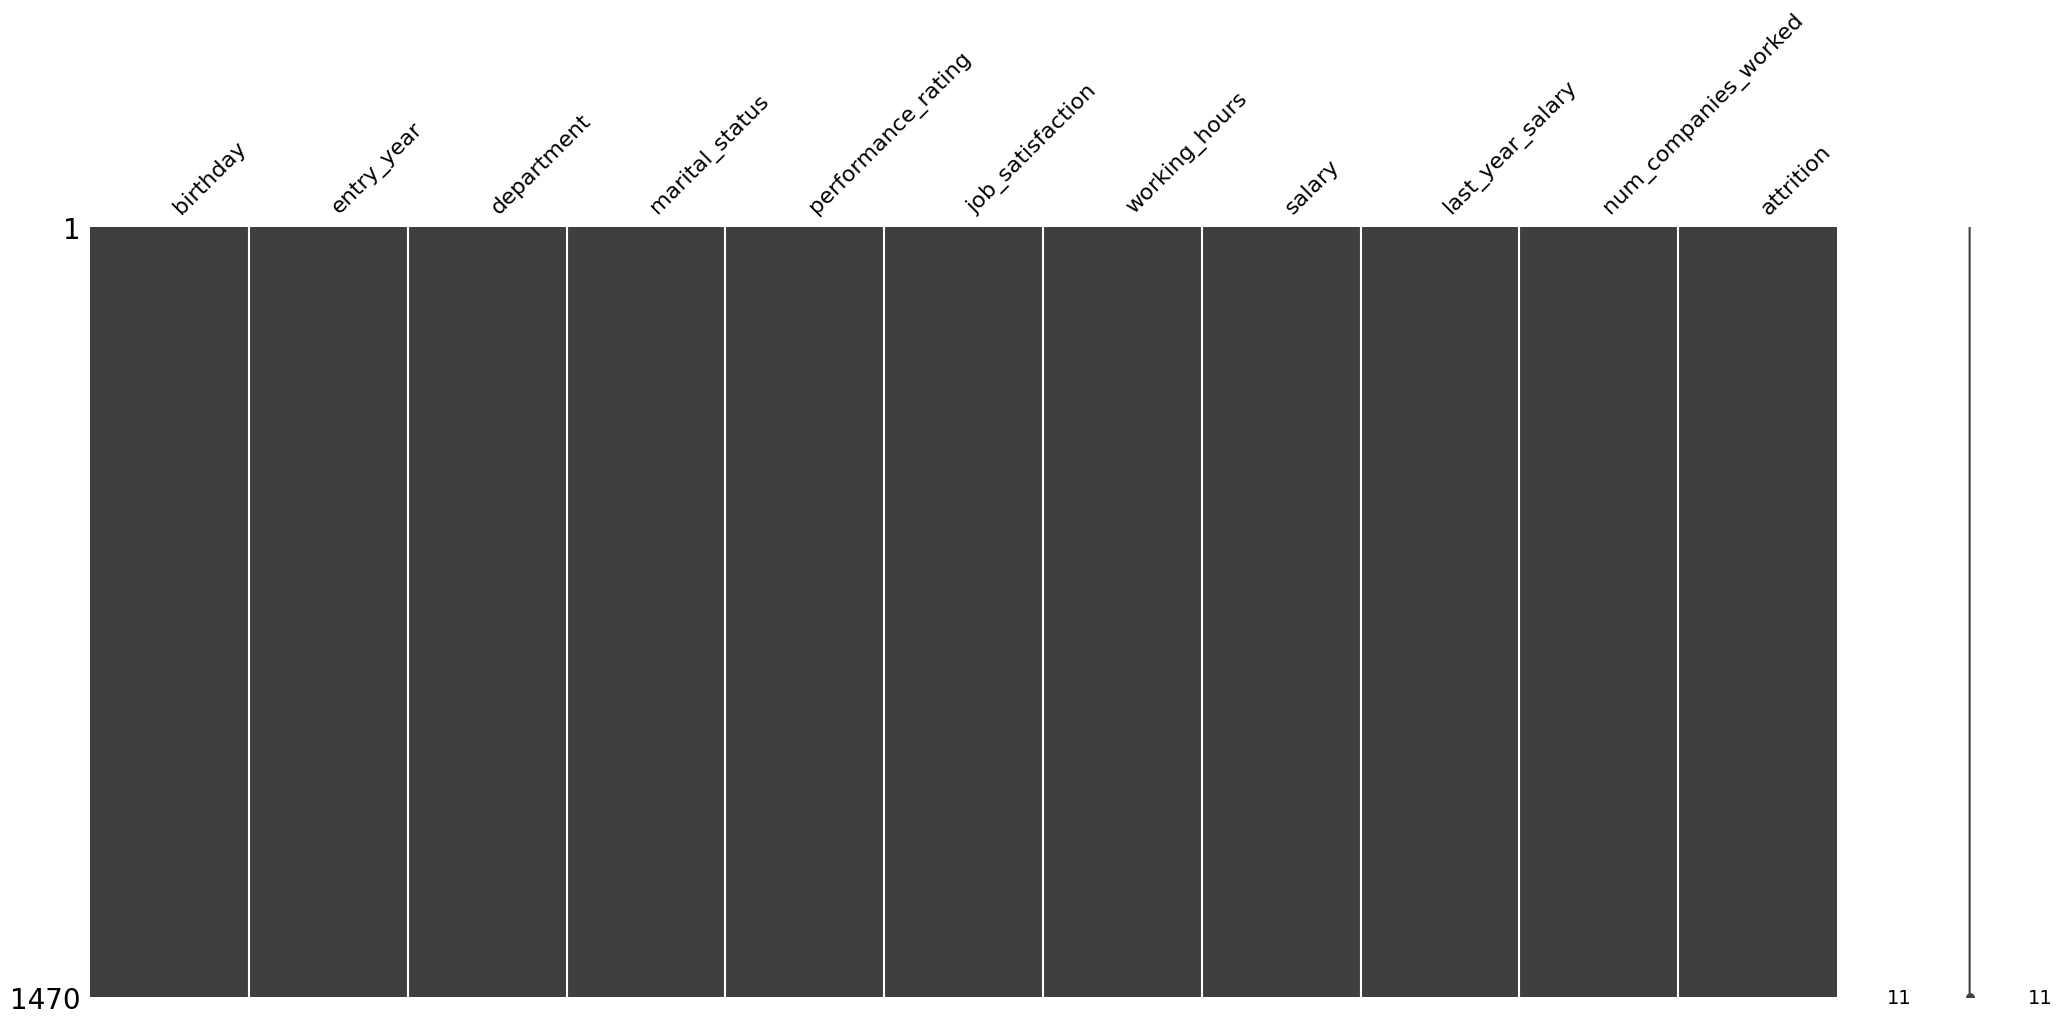

In [ ]:
msno.matrix(df)

###3. 이상치

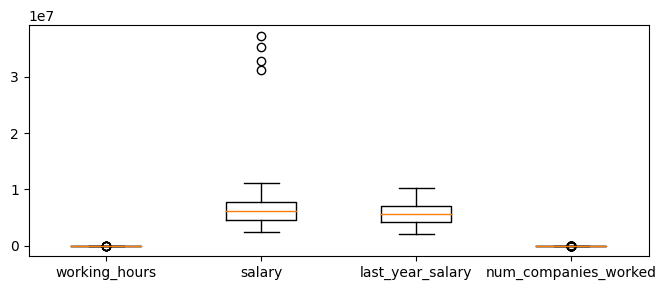

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))

ax.boxplot([df["working_hours"],
           df["salary"],
           df["last_year_salary"],
           df["num_companies_worked"]])
ax.set_xticklabels(["working_hours", "salary", "last_year_salary", "num_companies_worked"]);

#### IQR: Inter Quatrile Range


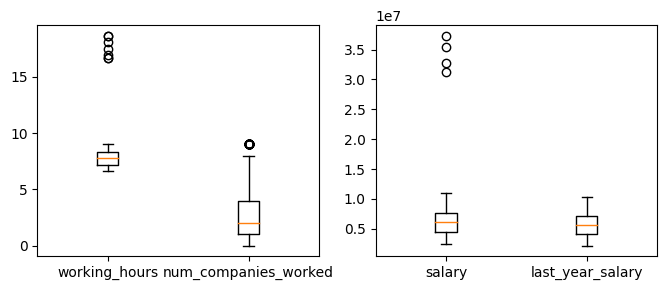

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))

ax1.boxplot([df["working_hours"],
             df["num_companies_worked"]]);
ax1.set_xticklabels(["working_hours", "num_companies_worked"]);

ax2.boxplot([df["salary"],
             df["last_year_salary"]]);
ax2.set_xticklabels(["salary", "last_year_salary"]);

IQR에서 떨어진 이상치 값 실제 확인하기 - 바 형태 그래프로

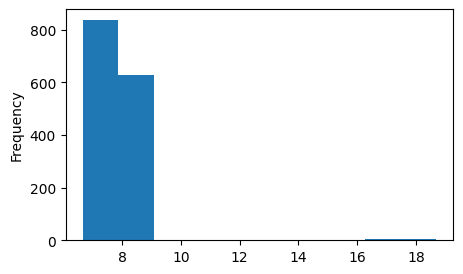

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))
df["working_hours"].plot(kind="hist", ax = ax);

##### 이상한 수치 16~18 근처 10개 값 정렬

In [ ]:
df["working_hours"].sort_values(ascending=False).head(10)

430     18.67
1041    18.67
67      18.10
494     17.50
184     16.93
1222    16.67
220     16.67
227      9.00
186      9.00
1038     9.00
Name: working_hours, dtype: float64

#####이상치 7개 값만 추려두기

In [ ]:
working_hours_top_indx = df["working_hours"].sort_values(ascending=False).head(7).index

#####이상치 - 이직한 횟수 : 괜찮음

In [ ]:
df["num_companies_worked"].max()

9.0

In [ ]:
len(df[df["num_companies_worked"] == df["num_companies_worked"].max()])

44

#####이상치 - 급여

In [ ]:
salary_top_indx = df["salary"].sort_values(ascending=False).head(4).index

##### drop함수 사용하여 이상치 삭제

In [ ]:
df.drop(working_hours_top_indx, inplace=True)
df.drop(salary_top_indx, inplace=True)

In [ ]:
len(df)

1459

<Axes: >

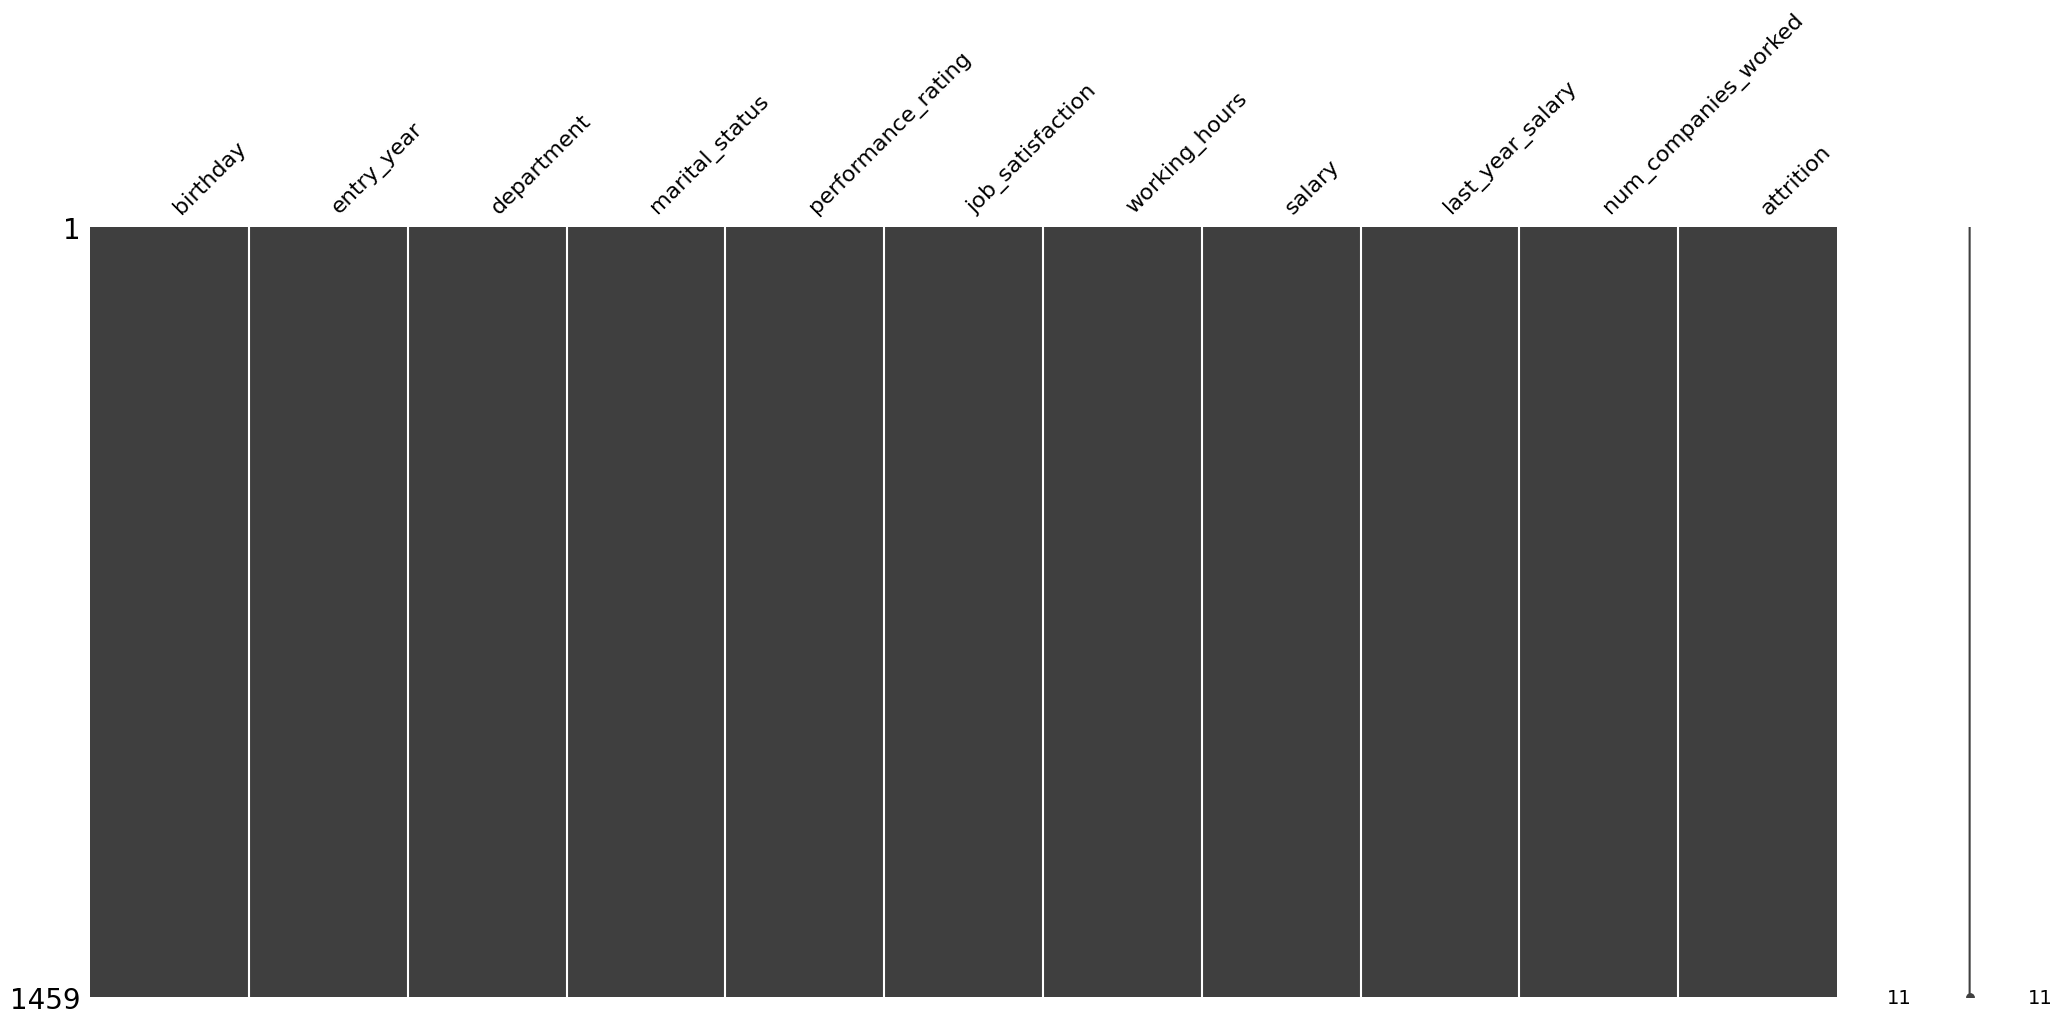

In [ ]:
msno.matrix(df)

##IQR(InterQuartile Range)

In [ ]:
q_1 = np.quantile(df["num_companies_worked"], 0.25)
q_2 = np.quantile(df["num_companies_worked"], 0.50)
q_3 = np.quantile(df["num_companies_worked"], 0.75)

In [ ]:
print("1분위값:", q_1)
print("2분위값:", q_2)
print("3분위값:", q_3)

1분위값: 1.0
2분위값: 2.0
3분위값: 4.0


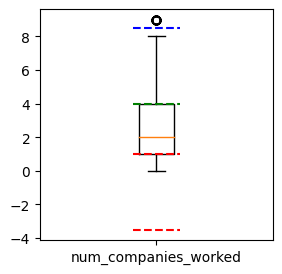

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
ax.boxplot(df["num_companies_worked"])
ax.set_xticklabels(["num_companies_worked"]);

#1분위
ax.plot([0.9, 1.1], [q_1, q_1], c="red", linestyle="--")
#2분위
ax.plot([0.9, 1.1],[q_3, q_3], c="green", linestyle="--")

#q_1-1.5*IQR = q_1-1.5*(q_3-q_1)
ax.plot([0.9, 1.1], [q_1-1.5*(q_3-q_1), q_1-1.5*(q_3-q_1)], c="red", linestyle="--");

#q_3+1.5*IQR = q_3+1.5*(q_3-q_1)
ax.plot([0.9, 1.1], [q_3+1.5*(q_3-q_1), q_3+1.5*(q_3-q_1)], c="blue", linestyle="--");

###4. 데이터 타입 변경과 특성 생성

4.1 numerical
*   birthday -> age
*   entry_year -> years_at company
*   salary&last_year_salary -> salary_increasing_rate




In [ ]:
df["birthday"] = pd.to_datetime(df["birthday"], format="%Y-%m-%d")
df["birth_year"] = df["birthday"].dt.year

In [ ]:
#df["birthday"].dt.day_name()

In [ ]:
df["age"]= 2024-df["birth_year"]+1

In [ ]:
df["years_at_company"] = 2024-df["entry_year"]+1

In [ ]:
df[df["years_at_company"] == 2]

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birth_year,age,years_at_company


In [ ]:
df["salary_increasing_rate"] = df["salary"]/df["last_year_salary"]*100-100

### 4.2 Categorical ordinal -> values


*   performance_rating
*   job_satisfaction



In [ ]:
df["performance_rating"].value_counts()

high         1234
very high     225
Name: performance_rating, dtype: int64

In [ ]:
df["job_satisfaction"].value_counts()

very high    458
high         438
low          285
medium       278
Name: job_satisfaction, dtype: int64

In [ ]:
level = {"low":0, "medium":1, "high":2, "very high":3}

In [ ]:
df["performance_rating"] = df["performance_rating"].replace(level)
df["job_satisfaction"] = df["job_satisfaction"].replace(level)

###4.3 Categorical nominal -> one hot 가즈아


*   department
*   marital_status
*   attrition

Get dummies 사용





In [ ]:
df["department"].value_counts()

rnd      956
sales    441
hr        62
Name: department, dtype: int64

In [ ]:
df["marital_status"].value_counts()

married    669
single     466
etc        324
Name: marital_status, dtype: int64

In [ ]:
df["attrition"].value_counts()

no     1225
yes     234
Name: attrition, dtype: int64

In [ ]:
categorical_one_hot = pd.get_dummies(df[["department", "marital_status"]])
categorical_one_hot

,department_hr,department_rnd,department_sales,marital_status_etc,marital_status_married,marital_status_single
0,0,0,1,0,0,1
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,0,1,0,0,1,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
1465,0,1,0,0,1,0
1466,0,1,0,0,1,0
1467,0,1,0,0,1,0
1468,0,0,1,0,1,0


##### 데이터 합치기

In [ ]:
df = df.merge(categorical_one_hot, left_index=True, right_index=True)

In [ ]:
df["attrition"] = pd.get_dummies(df["attrition"], drop_first=True)

In [ ]:
df[df.columns[2:]]

,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birth_year,age,years_at_company,salary_increasing_rate,department_hr,department_rnd,department_sales,marital_status_etc,marital_status_married,marital_status_single
0,sales,single,2,3,8.33,9431500,8923739,8.0,1,1980,45,12,5.690003,0,0,1,0,0,1
1,rnd,married,3,1,6.93,5170672,4617495,2.0,0,1972,53,14,11.980024,0,1,0,0,1,0
2,rnd,single,2,2,9.00,9898200,9176045,6.0,1,1984,41,11,7.870003,0,1,0,0,0,1
3,rnd,married,2,2,8.33,5673500,5362476,1.0,0,1988,37,12,5.800007,0,1,0,0,1,0
4,rnd,married,2,1,7.20,3484080,3284389,9.0,0,1994,31,10,6.080005,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,rnd,married,2,3,7.50,3488175,3214315,4.0,0,1985,40,21,8.520011,0,1,0,0,1,0
1466,rnd,married,2,0,8.33,4442500,4113806,4.0,0,1982,43,13,7.990022,0,1,0,0,1,0
1467,rnd,married,3,1,8.33,8715500,7908802,1.0,0,1994,31,10,10.200002,0,1,0,0,1,0
1468,sales,married,2,1,8.67,6804200,6333023,2.0,0,1972,53,21,7.440001,0,0,1,0,1,0


In [ ]:
df.to_csv("hr_data_preprocessing.csv", encoding="utf-8")